In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from IPython.utils import io
with io.capture_output() as captured: 
    %run ../../1-Preprocessing/Preprocessing/Preprocess.ipynb import x, y1, y2, X, Y1, Y2, vocabulary, Preprocessing

#### Join the Tweets into a Corpus

In [5]:
x = [' '.join(tweet) for tweet in x]
X = [' '.join(tweet) for tweet in X]


In [6]:
unigram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (1,1), use_idf=True, smooth_idf=True)

unigram_tfidf_feature = unigram_vectorizer.fit_transform(x)

dev_unigram_feature = unigram_vectorizer.transform(X)

In [7]:
bigram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (2,2), use_idf=True, smooth_idf=True)

bigram_tfidf_feature = bigram_vectorizer.fit_transform(x)

dev_bigram_feature = bigram_vectorizer.transform(X)

In [8]:
trigram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (3,3), use_idf=True, smooth_idf=True)

trigram_tfidf_feature = trigram_vectorizer.fit_transform(x)

dev_trigram_feature = trigram_vectorizer.transform(X)

In [9]:
ngram_vectorizer = TfidfVectorizer(token_pattern=r'\S+',ngram_range = (2,3), use_idf=True, smooth_idf=True)

ngram_tfidf_feature = ngram_vectorizer.fit_transform(x)

dev_ngram_feature = ngram_vectorizer.transform(X)

In [10]:
Features = {"method": "TF-IDF n-gram"}

In [11]:
print(unigram_tfidf_feature.shape)
print(bigram_tfidf_feature.shape)
print(trigram_tfidf_feature.shape)
print(ngram_tfidf_feature.shape)

(6988, 23818)
(6988, 74477)
(6988, 90530)
(6988, 165007)


In [26]:
tsvd = TruncatedSVD(n_components = 3)
  
bigram = tsvd.fit_transform(bigram_tfidf_feature)

trigram = tsvd.fit_transform(trigram_tfidf_feature)

ngram = tsvd.fit_transform(ngram_tfidf_feature)

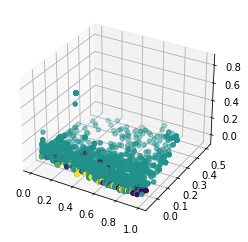

In [27]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter3D(bigram[:,0], bigram[:,1], bigram[:,2], c=y1)

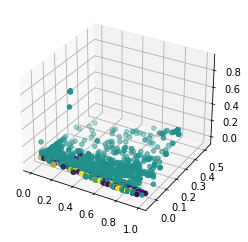

In [28]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter3D(trigram[:,0], trigram[:,1], trigram[:,2], c=y1)

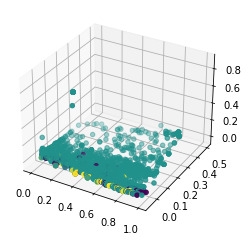

In [29]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter3D(ngram[:,0], ngram[:,1], ngram[:,2], c=y1)